In [1]:
import numpy as np
import pandas as pd
import os
import json
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)
        
data = list(parse_data('Sarcasm_Headlines_Dataset_v2.json'))

In [3]:
df = pd.DataFrame(data)
df.head()
df.shape

(28619, 3)

In [4]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [5]:
# Specify the data and vectorize  

vectorizer = TfidfVectorizer(max_features=1000, use_idf=False)
headlines = [i['headline'] for i in data]

x = vectorizer.fit_transform(headlines).toarray()
y = df['is_sarcastic'].values

# Split data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [6]:
# Initialize the constructor
model = Sequential() # Initialize constructor
model.add(Dense(32, activation='relu', input_shape=(1000,))) #input layer
model.add(Dense(4, activation='relu')) #hidden layer
model.add(Dense(1, activation='sigmoid')) #outer layer

In [7]:

# Compile the model using adam optimizer and binary_crossentropy loss function
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                32032     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 32,169
Trainable params: 32,169
Non-trainable params: 0
_________________________________________________________________


In [8]:
training = model.fit(x_train, y_train,epochs=55, batch_size=300, verbose=1)

Epoch 1/55
72/72 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.6509
Epoch 2/55
72/72 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7949
Epoch 3/55
72/72 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8131
Epoch 4/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8199
Epoch 5/55
72/72 [==============================] - 0s 4ms/step - loss: 0.3888 - accuracy: 0.8250
Epoch 6/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8247
Epoch 7/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8282
Epoch 8/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8292
Epoch 9/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8286
Epoch 10/55
72/72 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8295
Epoch 11/55
72/72 [

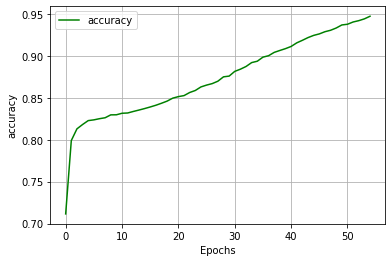

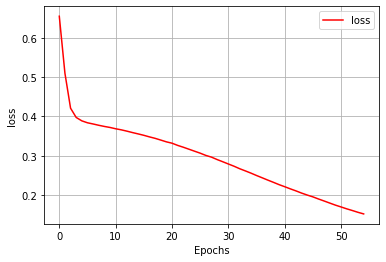

In [9]:
plt.plot(training.history["accuracy"],'g')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy"])
plt.grid()
plt.show()

plt.plot(training.history["loss"], 'r')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss"])
plt.grid()
plt.show()